## Kwadratury Gaussa 

#### Zadanie 1
Zaimplementuj całkowanie metodą Gaussa-Legendra stopnia 2 - 5.

Wyznaczyć wartości całek dla funkcji:

- $f(x) = 3x^3 - 1$ 
- $f(x) = 2 * x^2$
- $f(x) = 4*sin(x)$ 

Oczywiście, oblicz dokładne wartości całek oznaczonych! Porównać dokładność uzyskanych rezultatów z dokładnym wynikiem oraz z kwadraturami z poprzedniego ćwiczenia.

In [38]:
import math
import numpy as np
from scipy.special.orthogonal import p_roots
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def calculate_dx(a, b, n):
    return (b - a) / float(n)

def gauss_quadrature_rule(f, a, b, n):
    [x, w] = p_roots(n + 1)
    i = (b - a) * 0.5 * x + (b + a) * 0.5
    return (b - a) * 0.5 * sum(w * np.vectorize(f)(i))

def rect_rule (f, a, b, n):
    result = 0.0
    dx = calculate_dx(a, b, n)
    for i in range (0, n):
        result = result + f((a + (i*dx)))
    return dx*result

def trapez_rule(f, a, b, n):
    dx = calculate_dx(a, b, n)
    s = 0.5*(f(a) + f(b))
    for i in range(1, n):
        s = s + f(a + i*dx)
    return dx*s

def simps_rule(f, a, b, n):
    dx = calculate_dx(a, b, n)
    s1 = 0
    for i in range(1, n/2 + 1):
        s1 += f(a + (2*i - 1)*dx)
    s1 *= 4
    s2 = 0
    for i in range(1, n/2): 
        s2 += f(a + 2*i*dx)
    s2 *= 2
    return (b - a)/(3.0*n)*(f(a) + f(b) + s1 + s2)

def show_graphic(f, f_name, a, b, n):
    x = np.linspace(a, b, n)
    y = np.vectorize(f)(x)
    plt.title(f_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.plot(x, y, label = f_name)
    plt.show()
    
def relative_error(calculated_val, precise_val):
    return abs(calculated_val - precise_val) / abs(precise_val)

def calc_func(f, f_name, a, b, n):
    show_graphic(f, f_name, a, b, n)
    
    precise_val = integrate.quad(f, a, b)[0]
    rect_val = rect_rule(f, a, b, n)
    trapez_val = trapez_rule(f, a, b, n)
    simps_val = simps_rule(f, a, b, n)
    gauss_val = []
    for i in range (2, 6):
        gauss_val.append(gauss_quadrature_rule(f, a, b, i))
        
    print("Precise value:", precise_val)
    print("Rectangular rule:", rect_val, "Relative error:", relative_error(rect_val, precise_val))
    print("Trapezoidal rule:", trapez_val, "Relative error:", relative_error(trapez_val, precise_val))
    print("Simpson's rule:", simps_val, "Relative error:", relative_error(simps_val, precise_val))
    n = 2
    for i in gauss_val:
        print("Degree:", n, "Gaussa-Legendra's rule:", i, "Relative error:", 
              relative_error(i, precise_val))
        n+=1
    
    
      

def calculate(a, b, n):  
    calc_func(lambda x: 3 * x**3 - 1, "f(x) = 3x^3 - 1", a, b, n)
    calc_func(lambda x: 2 * x**2, "f(x) = 2 * x^2", a, b, n)
    calc_func(lambda x: 4 * math.sin(x), "f(x) = 4 * sin(x)", a, b, n)
   

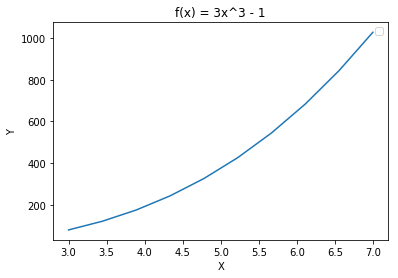

('Precise value:', 1736.0)
('Rectangular rule:', 1551.2000000000003, 'Relative error:', 0.10645161290322565)
('Trapezoidal rule:', 1740.8000000000004, 'Relative error:', 0.0027649769585255815)
("Simpson's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 4, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 5, "Gaussa-Legendra's rule:", 1736.0000000000005, 'Relative error:', 2.619512389898987e-16)


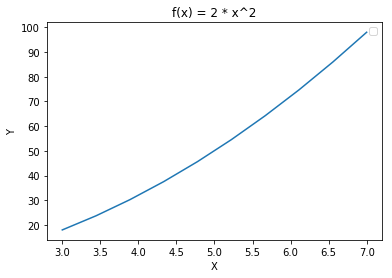

('Precise value:', 210.66666666666666)
('Rectangular rule:', 194.88000000000002, 'Relative error:', 0.07493670886075934)
('Trapezoidal rule:', 210.88000000000002, 'Relative error:', 0.0010126582278482596)
("Simpson's rule:", 210.66666666666666, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 210.66666666666663, 'Relative error:', 1.349131776759684e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 210.66666666666669, 'Relative error:', 1.349131776759684e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 210.66666666666666, 'Relative error:', 0.0)
('Degree:', 5, "Gaussa-Legendra's rule:", 210.66666666666669, 'Relative error:', 1.349131776759684e-16)


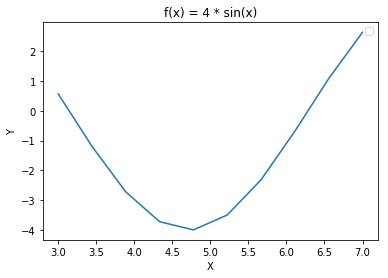

('Precise value:', -6.975579003775)
('Rectangular rule:', -7.295015587029979, 'Relative error:', 0.04579355822392785)
('Trapezoidal rule:', -6.882322314502841, 'Relative error:', 0.013369024882621303)
("Simpson's rule:", -6.976590305672759, 'Relative error:', 0.0001449774846234329)
('Degree:', 2, "Gaussa-Legendra's rule:", -7.003141674422721, 'Relative error:', 0.003951309365545829)
('Degree:', 3, "Gaussa-Legendra's rule:", -6.975066892533432, 'Relative error:', 7.341487226944744e-05)
('Degree:', 4, "Gaussa-Legendra's rule:", -6.975584845624604, 'Relative error:', 8.374716422677954e-07)
('Degree:', 5, "Gaussa-Legendra's rule:", -6.975578958683633, 'Relative error:', 6.4641753999283625e-09)


In [39]:
calculate(3, 7, 10)

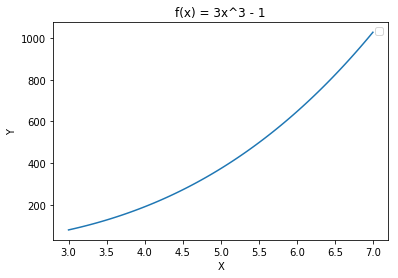

('Precise value:', 1736.0)
('Rectangular rule:', 1717.088, 'Relative error:', 0.010894009216589881)
('Trapezoidal rule:', 1736.048, 'Relative error:', 2.7649769585254504e-05)
("Simpson's rule:", 1736.0000000000005, 'Relative error:', 2.619512389898987e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 4, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 5, "Gaussa-Legendra's rule:", 1736.0000000000005, 'Relative error:', 2.619512389898987e-16)


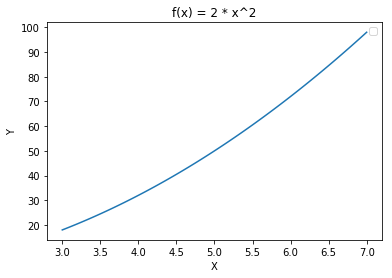

('Precise value:', 210.66666666666666)
('Rectangular rule:', 209.06880000000004, 'Relative error:', 0.00758481012658205)
('Trapezoidal rule:', 210.66880000000006, 'Relative error:', 1.0126582278817181e-05)
("Simpson's rule:", 210.6666666666667, 'Relative error:', 2.698263553519368e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 210.66666666666663, 'Relative error:', 1.349131776759684e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 210.66666666666669, 'Relative error:', 1.349131776759684e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 210.66666666666666, 'Relative error:', 0.0)
('Degree:', 5, "Gaussa-Legendra's rule:", 210.66666666666669, 'Relative error:', 1.349131776759684e-16)


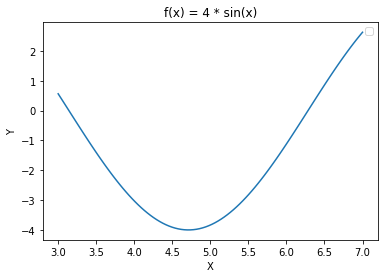

('Precise value:', -6.975579003775)
('Rectangular rule:', -7.0159182290242095, 'Relative error:', 0.0057829214216309965)
('Trapezoidal rule:', -6.974648901771495, 'Relative error:', 0.00013333688902401972)
("Simpson's rule:", -6.975579103002135, 'Relative error:', 1.4224931708097661e-08)
('Degree:', 2, "Gaussa-Legendra's rule:", -7.003141674422721, 'Relative error:', 0.003951309365545829)
('Degree:', 3, "Gaussa-Legendra's rule:", -6.975066892533432, 'Relative error:', 7.341487226944744e-05)
('Degree:', 4, "Gaussa-Legendra's rule:", -6.975584845624604, 'Relative error:', 8.374716422677954e-07)
('Degree:', 5, "Gaussa-Legendra's rule:", -6.975578958683633, 'Relative error:', 6.4641753999283625e-09)


In [40]:
calculate(3, 7, 100)

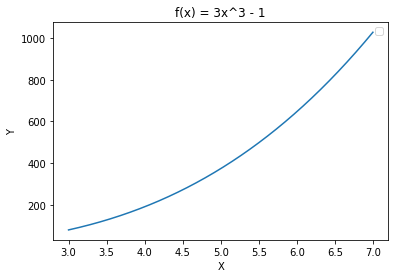

('Precise value:', 1736.0)
('Rectangular rule:', 1734.104479999999, 'Relative error:', 0.001091889400922202)
('Trapezoidal rule:', 1736.000479999999, 'Relative error:', 2.764976952854206e-07)
("Simpson's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 4, "Gaussa-Legendra's rule:", 1736.0, 'Relative error:', 0.0)
('Degree:', 5, "Gaussa-Legendra's rule:", 1736.0000000000005, 'Relative error:', 2.619512389898987e-16)


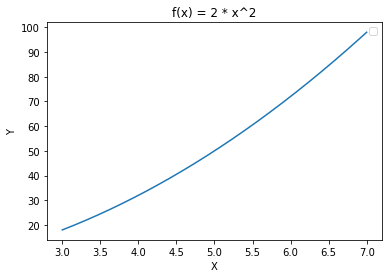

('Precise value:', 210.66666666666666)
('Rectangular rule:', 210.5066879999997, 'Relative error:', 0.00075939240506461)
('Trapezoidal rule:', 210.6666879999997, 'Relative error:', 1.0126582144983309e-07)
("Simpson's rule:", 210.66666666666666, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 210.66666666666663, 'Relative error:', 1.349131776759684e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 210.66666666666669, 'Relative error:', 1.349131776759684e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 210.66666666666666, 'Relative error:', 0.0)
('Degree:', 5, "Gaussa-Legendra's rule:", 210.66666666666669, 'Relative error:', 1.349131776759684e-16)


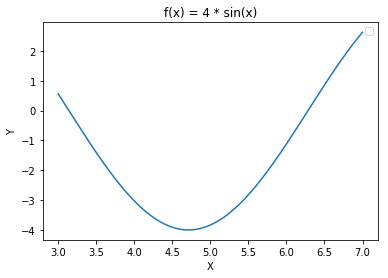

('Precise value:', -6.975579003775)
('Rectangular rule:', -6.9796966357257855, 'Relative error:', 0.0005902924973765612)
('Trapezoidal rule:', -6.975569703000515, 'Relative error:', 1.3333336888258531e-06)
("Simpson's rule:", -6.975579003784917, 'Relative error:', 1.421731476197827e-12)
('Degree:', 2, "Gaussa-Legendra's rule:", -7.003141674422721, 'Relative error:', 0.003951309365545829)
('Degree:', 3, "Gaussa-Legendra's rule:", -6.975066892533432, 'Relative error:', 7.341487226944744e-05)
('Degree:', 4, "Gaussa-Legendra's rule:", -6.975584845624604, 'Relative error:', 8.374716422677954e-07)
('Degree:', 5, "Gaussa-Legendra's rule:", -6.975578958683633, 'Relative error:', 6.4641753999283625e-09)


In [41]:
calculate(3, 7, 1000)

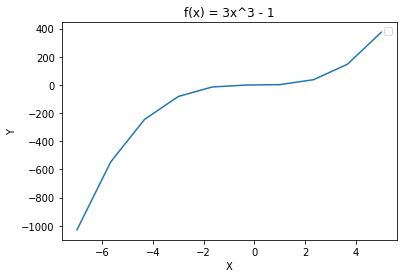

('Precise value:', -1344.0000000000005)
('Rectangular rule:', -2212.32, 'Relative error:', 0.6460714285714282)
('Trapezoidal rule:', -1369.9200000000003, 'Relative error:', 0.019285714285714163)
("Simpson's rule:", -1344.0000000000005, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", -1344.0000000000005, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", -1343.9999999999998, 'Relative error:', 5.075305255429286e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", -1344.0, 'Relative error:', 3.383536836952857e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", -1343.999999999999, 'Relative error:', 1.0150610510858572e-15)


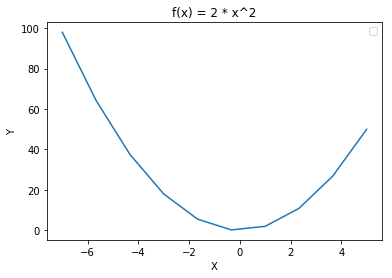

('Precise value:', 312.0)
('Rectangular rule:', 346.56, 'Relative error:', 0.11076923076923077)
('Trapezoidal rule:', 317.76, 'Relative error:', 0.018461538461538432)
("Simpson's rule:", 312.0, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 312.0000000000001, 'Relative error:', 3.643808901333847e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 311.99999999999994, 'Relative error:', 1.8219044506669235e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 311.99999999999994, 'Relative error:', 1.8219044506669235e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 311.9999999999999, 'Relative error:', 3.643808901333847e-16)


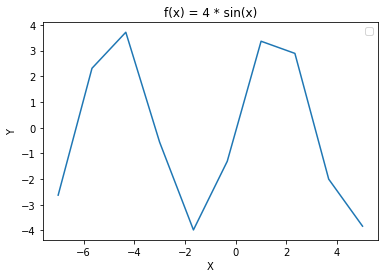

('Precise value:', 1.8809602755203116)
('Rectangular rule:', 2.3742856290722156, 'Relative error:', 0.2622731378074639)
('Trapezoidal rule:', 1.6496352068057762, 'Relative error:', 0.12298243175313535)
("Simpson's rule:", 1.9070020387081748, 'Relative error:', 0.013844929915204845)
('Degree:', 2, "Gaussa-Legendra's rule:", -16.49813580055289, 'Relative error:', 9.771123991966908)
('Degree:', 3, "Gaussa-Legendra's rule:", 5.740624722629796, 'Relative error:', 2.051964891199961)
('Degree:', 4, "Gaussa-Legendra's rule:", 1.4225859374302086, 'Relative error:', 0.24369166327199945)
('Degree:', 5, "Gaussa-Legendra's rule:", 1.9162037049808915, 'Relative error:', 0.018736934489927415)


In [42]:
calculate(-7, 5, 10)

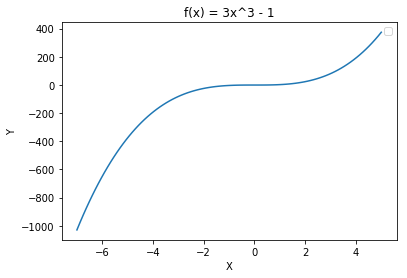

('Precise value:', -1344.0000000000005)
('Rectangular rule:', -1428.4992000000007, 'Relative error:', 0.0628714285714287)
('Trapezoidal rule:', -1344.2592000000006, 'Relative error:', 0.00019285714285728544)
("Simpson's rule:", -1344.0, 'Relative error:', 3.383536836952857e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", -1344.0000000000005, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", -1343.9999999999998, 'Relative error:', 5.075305255429286e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", -1344.0, 'Relative error:', 3.383536836952857e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", -1343.999999999999, 'Relative error:', 1.0150610510858572e-15)


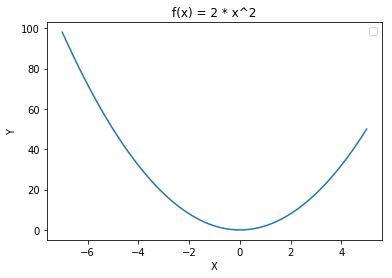

('Precise value:', 312.0)
('Rectangular rule:', 314.93759999999986, 'Relative error:', 0.009415384615384171)
('Trapezoidal rule:', 312.05759999999987, 'Relative error:', 0.00018461538461495437)
("Simpson's rule:", 312.0, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 312.0000000000001, 'Relative error:', 3.643808901333847e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 311.99999999999994, 'Relative error:', 1.8219044506669235e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 311.99999999999994, 'Relative error:', 1.8219044506669235e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 311.9999999999999, 'Relative error:', 3.643808901333847e-16)


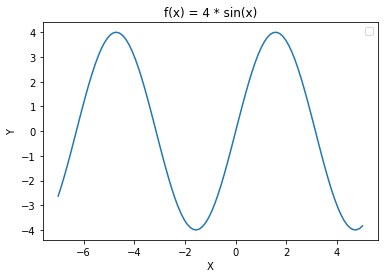

('Precise value:', 1.8809602755203116)
('Rectangular rule:', 1.951167623513975, 'Relative error:', 0.03732526885728226)
('Trapezoidal rule:', 1.878702581287334, 'Relative error:', 0.001200288098776143)
("Simpson's rule:", 1.8809624461068069, 'Relative error:', 1.1539778502812156e-06)
('Degree:', 2, "Gaussa-Legendra's rule:", -16.49813580055289, 'Relative error:', 9.771123991966908)
('Degree:', 3, "Gaussa-Legendra's rule:", 5.740624722629796, 'Relative error:', 2.051964891199961)
('Degree:', 4, "Gaussa-Legendra's rule:", 1.4225859374302086, 'Relative error:', 0.24369166327199945)
('Degree:', 5, "Gaussa-Legendra's rule:", 1.9162037049808915, 'Relative error:', 0.018736934489927415)


In [43]:
calculate(-7, 5, 100)

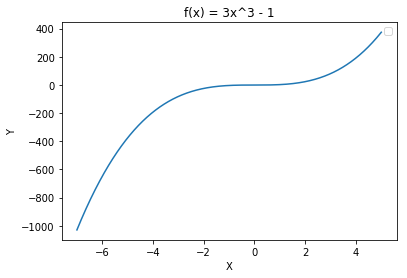

('Precise value:', -1344.0000000000005)
('Rectangular rule:', -1352.4265919999957, 'Relative error:', 0.00626978571428218)
('Trapezoidal rule:', -1344.002591999996, 'Relative error:', 1.9285714252248445e-06)
("Simpson's rule:", -1344.0000000000005, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", -1344.0000000000005, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", -1343.9999999999998, 'Relative error:', 5.075305255429286e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", -1344.0, 'Relative error:', 3.383536836952857e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", -1343.999999999999, 'Relative error:', 1.0150610510858572e-15)


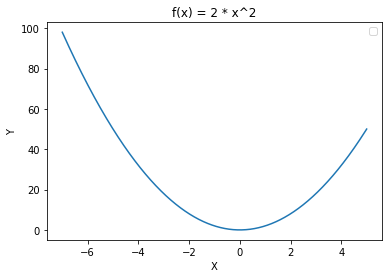

('Precise value:', 312.0)
('Rectangular rule:', 312.2885760000006, 'Relative error:', 0.0009249230769250097)
('Trapezoidal rule:', 312.0005760000006, 'Relative error:', 1.8461538480516117e-06)
("Simpson's rule:", 311.9999999999998, 'Relative error:', 7.287617802667694e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 312.0000000000001, 'Relative error:', 3.643808901333847e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 311.99999999999994, 'Relative error:', 1.8219044506669235e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 311.99999999999994, 'Relative error:', 1.8219044506669235e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 311.9999999999999, 'Relative error:', 3.643808901333847e-16)


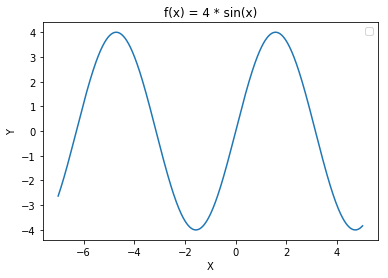

('Precise value:', 1.8809602755203116)
('Rectangular rule:', 1.888184208165508, 'Relative error:', 0.003840555666811251)
('Trapezoidal rule:', 1.8809377039428439, 'Relative error:', 1.2000028794613062e-05)
("Simpson's rule:", 1.880960275736998, 'Relative error:', 1.1519990580537142e-10)
('Degree:', 2, "Gaussa-Legendra's rule:", -16.49813580055289, 'Relative error:', 9.771123991966908)
('Degree:', 3, "Gaussa-Legendra's rule:", 5.740624722629796, 'Relative error:', 2.051964891199961)
('Degree:', 4, "Gaussa-Legendra's rule:", 1.4225859374302086, 'Relative error:', 0.24369166327199945)
('Degree:', 5, "Gaussa-Legendra's rule:", 1.9162037049808915, 'Relative error:', 0.018736934489927415)


In [44]:
calculate(-7, 5, 1000)

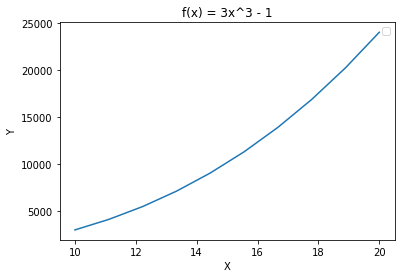

('Precise value:', 112489.99999999999)
('Rectangular rule:', 102215.0, 'Relative error:', 0.09134145257356198)
('Trapezoidal rule:', 112715.0, 'Relative error:', 0.002000177793581781)
("Simpson's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 112490.00000000001, 'Relative error:', 2.587237128343293e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)


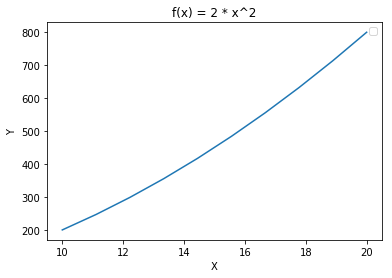

('Precise value:', 4666.666666666666)
('Rectangular rule:', 4370.0, 'Relative error:', 0.06357142857142845)
('Trapezoidal rule:', 4670.0, 'Relative error:', 0.0007142857142858443)
("Simpson's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 4, "Gaussa-Legendra's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)


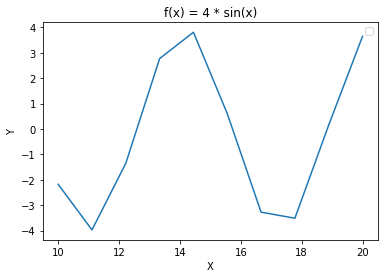

('Precise value:', -4.988614363559377)
('Rectangular rule:', -7.479731393660902, 'Relative error:', 0.4993605134721443)
('Trapezoidal rule:', -4.565798670426908, 'Relative error:', 0.08475613914377428)
("Simpson's rule:", -5.020014078374073, 'Relative error:', 0.0062942758301910776)
('Degree:', 2, "Gaussa-Legendra's rule:", 0.8056882615559618, 'Relative error:', 1.1615054207118753)
('Degree:', 3, "Gaussa-Legendra's rule:", -5.763398066981247, 'Relative error:', 0.15531040223944292)
('Degree:', 4, "Gaussa-Legendra's rule:", -4.928045526805088, 'Relative error:', 0.012141414898038728)
('Degree:', 5, "Gaussa-Legendra's rule:", -4.991732325612155, 'Relative error:', 0.000625015650749322)


In [45]:
calculate(10, 20, 10)

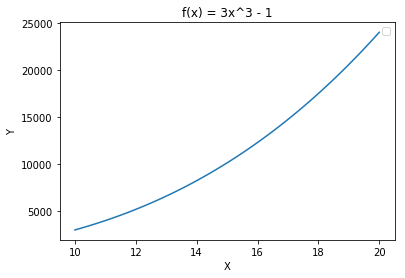

('Precise value:', 112489.99999999999)
('Rectangular rule:', 111442.25000000003, 'Relative error:', 0.00931416125877817)
('Trapezoidal rule:', 112492.25000000003, 'Relative error:', 2.0001777936204604e-05)
("Simpson's rule:", 112490.00000000001, 'Relative error:', 2.587237128343293e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 112490.00000000001, 'Relative error:', 2.587237128343293e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)


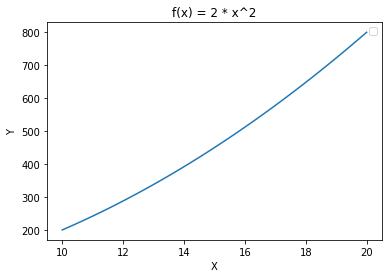

('Precise value:', 4666.666666666666)
('Rectangular rule:', 4636.700000000001, 'Relative error:', 0.0064214285714282865)
('Trapezoidal rule:', 4666.700000000001, 'Relative error:', 7.142857143142985e-06)
("Simpson's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 4, "Gaussa-Legendra's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)


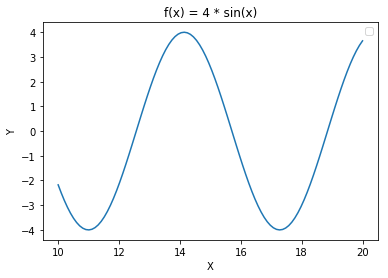

('Precise value:', -4.988614363559377)
('Rectangular rule:', -5.27584976421836, 'Relative error:', 0.057578193006291994)
('Trapezoidal rule:', -4.984456491894959, 'Relative error:', 0.0008334722553000718)
("Simpson's rule:", -4.988617138314615, 'Relative error:', 5.562176259385511e-07)
('Degree:', 2, "Gaussa-Legendra's rule:", 0.8056882615559618, 'Relative error:', 1.1615054207118753)
('Degree:', 3, "Gaussa-Legendra's rule:", -5.763398066981247, 'Relative error:', 0.15531040223944292)
('Degree:', 4, "Gaussa-Legendra's rule:", -4.928045526805088, 'Relative error:', 0.012141414898038728)
('Degree:', 5, "Gaussa-Legendra's rule:", -4.991732325612155, 'Relative error:', 0.000625015650749322)


In [46]:
calculate(10, 20, 100)

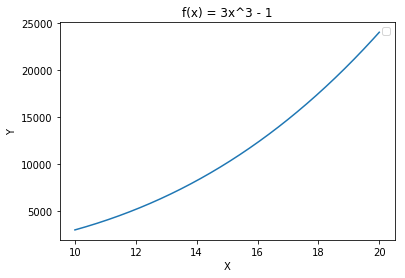

('Precise value:', 112489.99999999999)
('Rectangular rule:', 112385.02250000002, 'Relative error:', 0.0009332162858917638)
('Trapezoidal rule:', 112490.02250000002, 'Relative error:', 2.0001777967380812e-07)
("Simpson's rule:", 112490.00000000006, 'Relative error:', 6.468092820858234e-16)
('Degree:', 2, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 3, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)
('Degree:', 4, "Gaussa-Legendra's rule:", 112490.00000000001, 'Relative error:', 2.587237128343293e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 112490.0, 'Relative error:', 1.2936185641716466e-16)


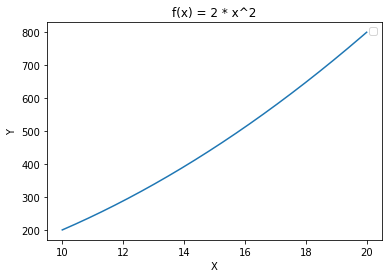

('Precise value:', 4666.666666666666)
('Rectangular rule:', 4663.667, 'Relative error:', 0.000642785714285505)
('Trapezoidal rule:', 4666.667, 'Relative error:', 7.142857163801508e-08)
("Simpson's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 2, "Gaussa-Legendra's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 3, "Gaussa-Legendra's rule:", 4666.666666666666, 'Relative error:', 0.0)
('Degree:', 4, "Gaussa-Legendra's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)
('Degree:', 5, "Gaussa-Legendra's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)


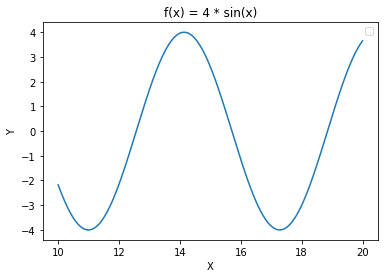

('Precise value:', -4.988614363559377)
('Rectangular rule:', -5.017712118936071, 'Relative error:', 0.005832833178937595)
('Trapezoidal rule:', -4.988572791703732, 'Relative error:', 8.333347221362644e-06)
("Simpson's rule:", -4.988614363836528, 'Relative error:', 5.555665894349844e-11)
('Degree:', 2, "Gaussa-Legendra's rule:", 0.8056882615559618, 'Relative error:', 1.1615054207118753)
('Degree:', 3, "Gaussa-Legendra's rule:", -5.763398066981247, 'Relative error:', 0.15531040223944292)
('Degree:', 4, "Gaussa-Legendra's rule:", -4.928045526805088, 'Relative error:', 0.012141414898038728)
('Degree:', 5, "Gaussa-Legendra's rule:", -4.991732325612155, 'Relative error:', 0.000625015650749322)


In [47]:
calculate(10, 20, 1000)

#### Zadanie 2 (dla chętnych)
Zaimplementować pozostałe postacie (wystarczy jedną) kwadratury Gaussa (-Czebyszewa, -Laguerre, -Hermite)